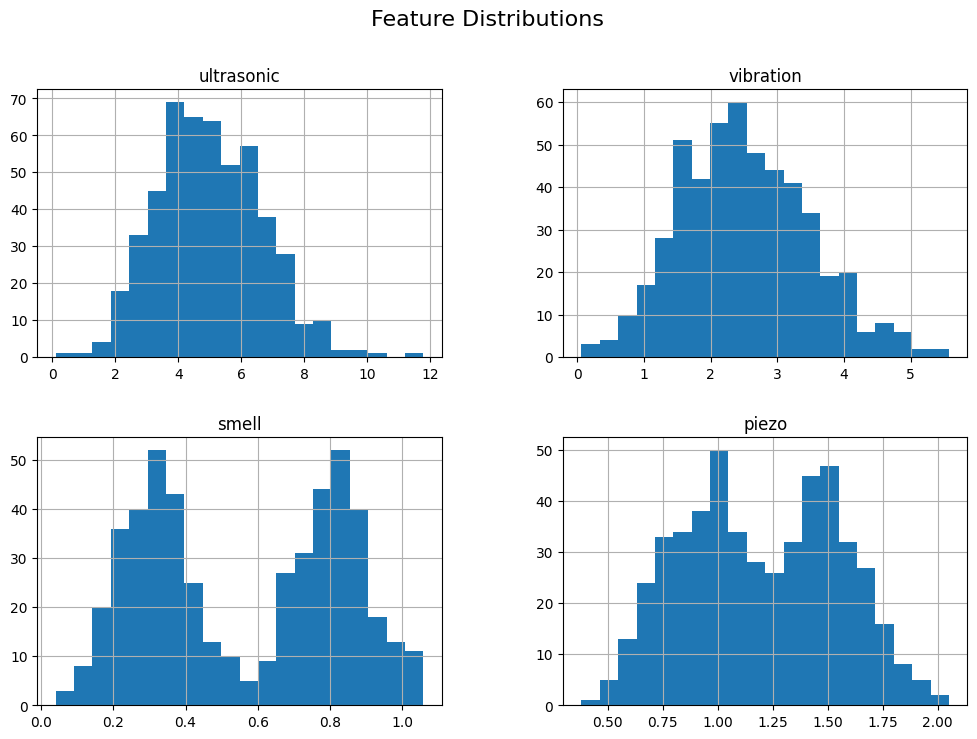

🔍 Sample Data:


,ultrasonic,vibration,smell,piezo,leak_status
0,4.413434,1.788984,0.864720,1.601094,1
1,6.770679,4.754794,0.733710,1.571123,1
2,11.779097,4.696456,0.974958,1.499858,1
3,4.929561,2.560248,0.294423,0.939790,0
4,3.168508,2.842522,0.290111,1.004503,0


📊 Feature Summary:


,ultrasonic,vibration,smell,piezo,leak_status
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.007842,2.518727,0.560848,1.197697,0.500000
std,1.656122,0.976409,0.270126,0.351031,0.500501
min,0.110479,0.060897,0.040896,0.379157,0.000000
25%,3.845831,1.805823,0.313579,0.906189,0.000000
50%,4.900601,2.476378,0.549680,1.188987,0.500000
75%,6.174226,3.164747,0.810449,1.495201,1.000000
max,11.779097,5.573360,1.057971,2.051932,1.000000


📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

🧮 Confusion Matrix:
 [[ 97   0]
 [  0 103]]
✅ Model and scaler saved for Model B with 4 features.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt


# Load dataset (make sure this is the 500-row CSV)
df = pd.read_csv("modelB_sensor_dataset.csv")

# Use only the 4 selected features
X = df[["ultrasonic", "vibration", "smell", "piezo"]]
y = df["leak_status"]

# Histograms of each feature
df[["ultrasonic", "vibration", "smell", "piezo"]].hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Preview data
print("🔍 Sample Data:")
display(df.head())

# Summary statistics
print("📊 Feature Summary:")
display(df.describe())


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42
)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("📋 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model and scaler
joblib.dump(model, "modelB_sensor_rf_model.pkl")
joblib.dump(scaler, "modelB_scaler.pkl")
print("✅ Model and scaler saved for Model B with 4 features.")



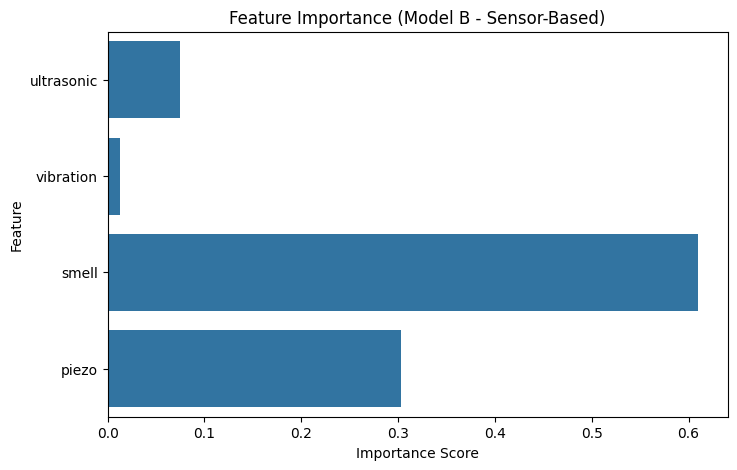

<Figure size 600x400 with 0 Axes>

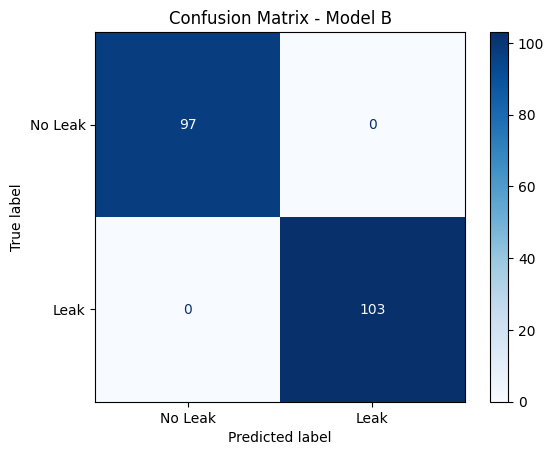

In [11]:
# Only run after training `model`
import seaborn as sns

feature_names = ["ultrasonic", "vibration", "smell", "piezo"]
importances = model.feature_importances_

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Model B - Sensor-Based)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Reuse y_test and y_pred
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Leak", "Leak"])

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix - Model B")
plt.show()


In [24]:
import numpy as np
import pandas as pd
import joblib

# === Load model and scaler ===
model = joblib.load("modelB_sensor_rf_model.pkl")
scaler = joblib.load("modelB_scaler.pkl")

# === Simulate random sensor input ===
# Use realistic means and standard deviations (based on your training data)
sensor_input = {
    "ultrasonic": np.random.normal(5.0, 1.5),   # Example: mean=5, std=1.5
    "vibration": np.random.normal(2.0, 0.5),    # Example: mean=2, std=0.5
    "smell": np.random.normal(0.5, 0.2),        # Example: mean=0.5, std=0.2
    "piezo": np.random.normal(1.2, 0.3)         # Example: mean=1.2, std=0.3
}

print("🧪 Simulated Sensor Input:")
for k, v in sensor_input.items():
    print(f"  {k}: {v:.2f}")

# Convert to DataFrame
input_df = pd.DataFrame([sensor_input])

# Scale and predict
input_scaled = scaler.transform(input_df)
prediction = model.predict(input_scaled)[0]
confidence = model.predict_proba(input_scaled)[0][prediction]

# Output
label = "LEAK DETECTED" if prediction == 1 else "NO LEAK"
print(f"\n🔍 Prediction: {label}")
print(f"🧠 Confidence: {confidence:.2f}")


🧪 Simulated Sensor Input:
  ultrasonic: 5.68
  vibration: 1.97
  smell: 0.56
  piezo: 0.89

🔍 Prediction: NO LEAK
🧠 Confidence: 0.66
